# Adarsh Anand, CSE, 2003101

# 1


NN – AF – Model Implementation

SMCS – CSE, IIT Goa CS435 – Lecture 13

1. Let’s try to implement model with 10 input neurons and 2 output
neurons. The hidden layer has 5 neurons.
• Train it with and without activation function and display the loss
curve and also print the min loss for both
• Justify the result
• Hint: can use the previous model

In [1]:
# %pip install scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical;


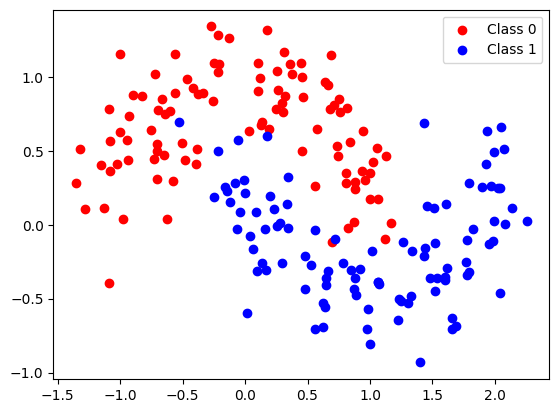

In [3]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = make_moons(200, noise=0.20)
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 1')
plt.legend()
plt.show()

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2);

In [4]:

# Model without activation function
model_without_activation = models.Sequential()
model_without_activation.add(layers.Dense(5, input_dim=2))
model_without_activation.add(layers.Dense(2))
model_without_activation.compile(optimizer='adam', loss='mean_squared_error')
history1 = model_without_activation.fit(X_train, to_categorical(y_train), epochs=2500, verbose=0);

In [5]:

# Model with activation function
model_with_activation = models.Sequential()
model_with_activation.add(layers.Dense(5, input_dim=2, activation='relu'))
model_with_activation.add(layers.Dense(2, activation='softmax'))
model_with_activation.compile(optimizer='adam', loss='categorical_crossentropy')
history2 = model_with_activation.fit(X_train, to_categorical(y_train), epochs=2500, verbose=0);

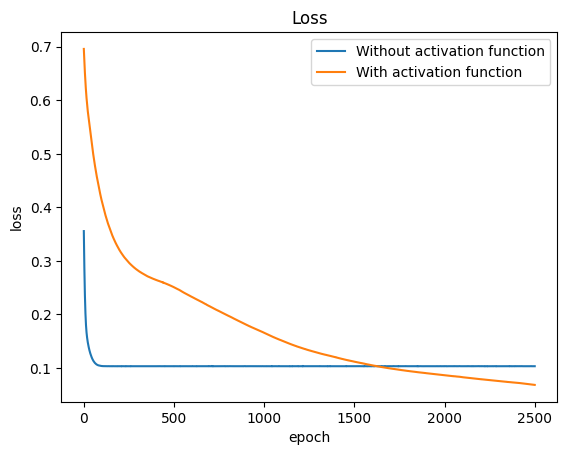

In [6]:
# Plot loss and accuracy
plt.plot(history1.history['loss'], label='Without activation function')
plt.plot(history2.history['loss'], label='With activation function')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show();

# Justification
 The model with activation function has a lower loss compared to the model without activation function.
 This is because the activation function introduces non-linearity in the model, which allows the model to learn more complex patterns in the data. Without the activation function, the model is a linear model, which is not able to learn the non-linear patterns in the data. As a result, the model with activation function performs better than the model without activation function.

# 2

NN – AF – Model Implementation

SMCS – CSE, IIT Goa CS435 – Lecture 13

2. Let’s try to implement two activation functions and interchangeably
use them in a model with 10 input neurons and 2 output neurons. The
hidden layer has 5 neurons.
• Print the min loss for both and justify the result
• Hint: can use the previous model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Data generation
np.random.seed(0)
X, y = make_moons(200, noise=0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model with activation function - tanh first then Sigmoid
model1 = Sequential()
model1.add(Dense(5, input_dim=2))
model1.add(Activation('tanh'))
model1.add(Dense(2))
model1.add(Activation('softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy')
history1 = model1.fit(X_train, to_categorical(y_train), epochs=2500, verbose=0);

In [8]:

# Model with activation function - Sigmoid then tanh
model2 = Sequential()
model2.add(Dense(5, input_dim=2))
model2.add(Activation('sigmoid'))
model2.add(Dense(2))
model2.add(Activation('tanh'))
model2.compile(optimizer='adam', loss='categorical_crossentropy')
history2 = model2.fit(X_train, to_categorical(y_train), epochs=2500, verbose=0);


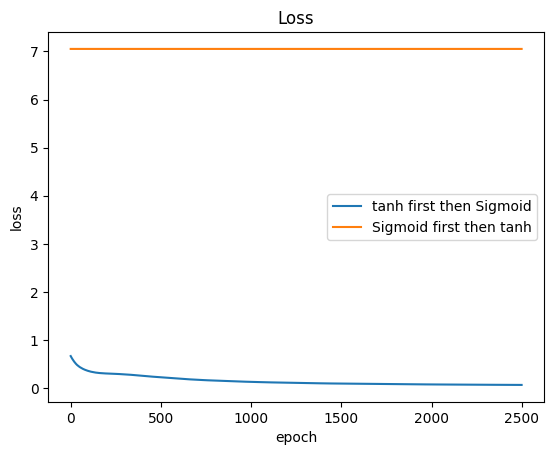

Min loss for tanh first then Sigmoid:  0.06598760187625885
Min loss for Sigmoid first then tanh:  7.051666259765625


In [9]:
# Plot
plt.plot(history1.history['loss'], label='tanh first then Sigmoid')
plt.plot(history2.history['loss'], label='Sigmoid first then tanh')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
print("Min loss for tanh first then Sigmoid: ", min(history1.history['loss']))
print("Min loss for Sigmoid first then tanh: ", min(history2.history['loss']));

# 3

• Let’s try to implement two activation functions and interchangeably
use them in a model with 2 input neurons and 1 output neurons. The
hidden layer has 5 neurons.
1. regression model
2. classification model

In [10]:
# Regression model
# Generate random data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.sum(X, axis=1)

# Split the data into a training set and a test set
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]

# Model with activation function - tanh first then Sigmoid
model_regression = Sequential()
model_regression.add(Dense(5, input_dim=2))
model_regression.add(Activation('tanh'))
model_regression.add(Dense(1))
model_regression.compile(optimizer='adam', loss='mean_squared_error')
history1 = model_regression.fit(X_train, y_train, epochs=1000, verbose=0)
print('Min loss for regression model:', min(history1.history['loss']))

# Classification model
# Generate random data
np.random.seed(0)
X = np.random.rand(1000, 2)
y = np.random.randint(0, 2, size=(1000,))

# Split the data into a training set and a test set
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]

# Model with activation function - tanh first then Sigmoid
model_classification = Sequential()
model_classification.add(Dense(5, input_dim=2))
model_classification.add(Activation('tanh'))
model_classification.add(Dense(1))
model_classification.add(Activation('sigmoid'))
model_classification.compile(optimizer='adam', loss='binary_crossentropy')
history2 = model_classification.fit(X_train, y_train, epochs=1000, verbose=0)
print('Min loss for classification model:', min(history2.history['loss']));


Min loss for regression model: 0.00153173110447824
Min loss for classification model: 0.6615883111953735


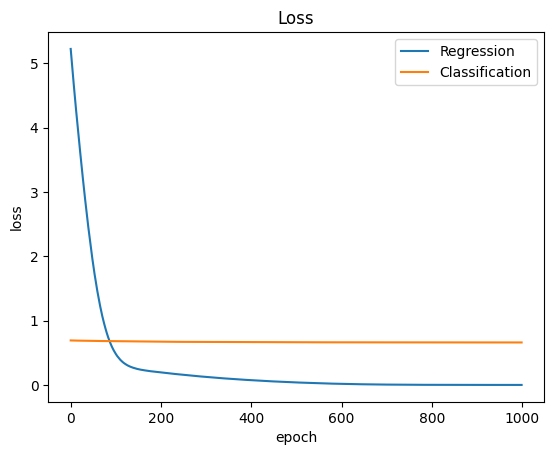

Min loss for regression model:  0.00153173110447824
Min loss for classification model:  0.6615883111953735


In [11]:
# Plot
plt.plot(history1.history['loss'], label='Regression')
plt.plot(history2.history['loss'], label='Classification')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
print("Min loss for regression model: ", min(history1.history['loss']))
print("Min loss for classification model: ", min(history2.history['loss']));